In [1]:
!pip install torch torchvision torch-geometric


In [2]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.data import Data, DataLoader
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
import numpy as np

# Hyperparameters
num_epochs = 20
batch_size = 64
learning_rate = 0.001
num_classes = 100

# Convert each CIFAR-100 image into a graph
def image_to_graph(image, label):
    c, h, w = image.shape
    num_nodes = h * w
    node_features = image.view(c, -1).T  # shape: (h * w, c)
    
    # Creating edges (connecting each node to its 4-nearest neighbors)
    edges = []
    for row in range(h):
        for col in range(w):
            idx = row * w + col
            # Right neighbor
            if col < w - 1:
                edges.append([idx, idx + 1])
            # Bottom neighbor
            if row < h - 1:
                edges.append([idx, idx + w])
    
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    return Data(x=node_features, edge_index=edge_index, y=label)

# Load CIFAR-100 dataset
transform = transforms.Compose([
    transforms.ToTensor()
])
cifar100_train = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
cifar100_test = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Convert dataset to graph format
train_graphs = [image_to_graph(data[0], data[1]) for data in cifar100_train]
test_graphs = [image_to_graph(data[0], data[1]) for data in cifar100_test]

train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False)

# Define a GNN model
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.linear = torch.nn.Linear(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = global_mean_pool(x, batch)  # Pooling
        x = self.linear(x)
        return F.log_softmax(x, dim=1)

# Initialize the model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(in_channels=3, hidden_channels=64, out_channels=num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train and evaluate the model
def train():
    model.train()
    total_loss = 0
    correct = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = F.nll_loss(out, data.y)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item() * data.num_graphs
        pred = out.argmax(dim=1)
        correct += (pred == data.y).sum().item()
    return total_loss / len(train_loader.dataset), correct / len(train_loader.dataset)

def test(loader):
    model.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out = model(data)
            loss = F.nll_loss(out, data.y)
            
            total_loss += loss.item() * data.num_graphs
            pred = out.argmax(dim=1)
            correct += (pred == data.y).sum().item()
    return total_loss / len(loader.dataset), correct / len(loader.dataset)

for epoch in range(1, num_epochs + 1):
    train_loss, train_acc = train()
    test_loss, test_acc = test(test_loader)
    print(f'Epoch: {epoch:02d}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, '
          f'Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "C:\Users\Sas

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "C:\Users\Sas

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "C:\Users\Sas

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "C:\Users\Sas

AttributeError: _ARRAY_API not found

100%|███████████████████████████████████████████████████████████████████████████████| 169M/169M [00:53<00:00, 3.15MB/s]


Extracting ./data\cifar-100-python.tar.gz to ./data
Files already downloaded and verified


C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch: 01, Train Loss: 4.3921, Train Acc: 0.0315, Test Loss: 4.2805, Test Acc: 0.0478
Epoch: 02, Train Loss: 4.2490, Train Acc: 0.0495, Test Loss: 4.2289, Test Acc: 0.0532
Epoch: 03, Train Loss: 4.2004, Train Acc: 0.0578, Test Loss: 4.1937, Test Acc: 0.0604
Epoch: 04, Train Loss: 4.1748, Train Acc: 0.0627, Test Loss: 4.1662, Test Acc: 0.0675
Epoch: 05, Train Loss: 4.1524, Train Acc: 0.0660, Test Loss: 4.1424, Test Acc: 0.0698
Epoch: 06, Train Loss: 4.1321, Train Acc: 0.0682, Test Loss: 4.1299, Test Acc: 0.0736
Epoch: 07, Train Loss: 4.1164, Train Acc: 0.0704, Test Loss: 4.1179, Test Acc: 0.0714
Epoch: 08, Train Loss: 4.1053, Train Acc: 0.0752, Test Loss: 4.1058, Test Acc: 0.0757
Epoch: 09, Train Loss: 4.0948, Train Acc: 0.0750, Test Loss: 4.0982, Test Acc: 0.0778
Epoch: 10, Train Loss: 4.0829, Train Acc: 0.0787, Test Loss: 4.0823, Test Acc: 0.0786
Epoch: 11, Train Loss: 4.0684, Train Acc: 0.0825, Test Loss: 4.0678, Test Acc: 0.0781
Epoch: 12, Train Loss: 4.0543, Train Acc: 0.0847, Test

Files already downloaded and verified
Files already downloaded and verified


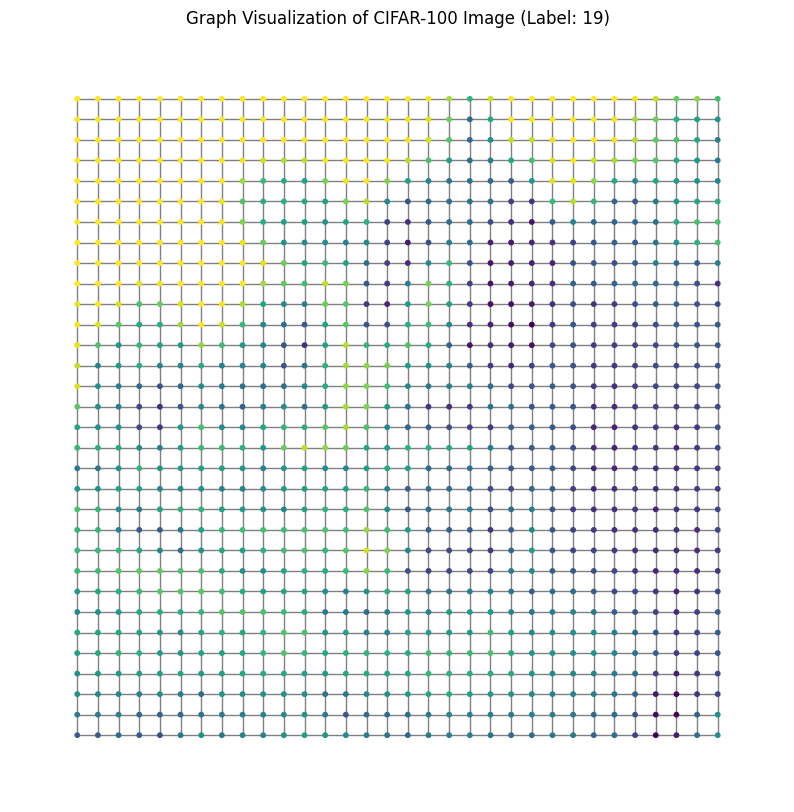

C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch: 01, Train Loss: 4.3864, Train Acc: 0.0334, Test Loss: 4.2787, Test Acc: 0.0466
Epoch: 02, Train Loss: 4.2497, Train Acc: 0.0492, Test Loss: 4.2262, Test Acc: 0.0543
Epoch: 03, Train Loss: 4.2029, Train Acc: 0.0576, Test Loss: 4.1978, Test Acc: 0.0614
Epoch: 04, Train Loss: 4.1855, Train Acc: 0.0605, Test Loss: 4.1826, Test Acc: 0.0595
Epoch: 05, Train Loss: 4.1736, Train Acc: 0.0612, Test Loss: 4.1677, Test Acc: 0.0655
Epoch: 06, Train Loss: 4.1572, Train Acc: 0.0667, Test Loss: 4.1528, Test Acc: 0.0678
Epoch: 07, Train Loss: 4.1393, Train Acc: 0.0694, Test Loss: 4.1337, Test Acc: 0.0739
Epoch: 08, Train Loss: 4.1229, Train Acc: 0.0725, Test Loss: 4.1147, Test Acc: 0.0762
Epoch: 09, Train Loss: 4.1085, Train Acc: 0.0745, Test Loss: 4.0999, Test Acc: 0.0790
Epoch: 10, Train Loss: 4.0926, Train Acc: 0.0782, Test Loss: 4.0852, Test Acc: 0.0777
Epoch: 11, Train Loss: 4.0756, Train Acc: 0.0818, Test Loss: 4.0761, Test Acc: 0.0839
Epoch: 12, Train Loss: 4.0585, Train Acc: 0.0852, Test

In [5]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.data import Data, DataLoader
from torchvision import datasets, transforms
import networkx as nx
import matplotlib.pyplot as plt

# Hyperparameters
num_epochs = 20
batch_size = 64
learning_rate = 0.001
num_classes = 100

# Convert CIFAR-100 image to graph
def image_to_graph(image, label):
    c, h, w = image.shape
    num_nodes = h * w
    node_features = image.view(c, -1).T  # shape: (h * w, c)
    
    edges = []
    for row in range(h):
        for col in range(w):
            idx = row * w + col
            # Right neighbor
            if col < w - 1:
                edges.append((idx, idx + 1))
            # Bottom neighbor
            if row < h - 1:
                edges.append((idx, idx + w))
    
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    return Data(x=node_features, edge_index=edge_index, y=label)

# Function to visualize a graph (image as graph)
def visualize_graph(image, label):
    c, h, w = image.shape
    num_nodes = h * w
    node_features = image.view(c, -1).T  # shape: (h * w, c)

    # Create graph
    edges = []
    for row in range(h):
        for col in range(w):
            idx = row * w + col
            # Right neighbor
            if col < w - 1:
                edges.append((idx, idx + 1))
            # Bottom neighbor
            if row < h - 1:
                edges.append((idx, idx + w))
    
    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))
    G.add_edges_from(edges)
    
    # Set node colors based on pixel intensity (grayscale average)
    node_colors = node_features.mean(dim=1).cpu().numpy()

    # Create a figure and axis explicitly
    plt.figure(figsize=(10, 10))
    ax = plt.gca()  # Get current axis

    # Position the nodes in a 32x32 grid
    pos = {i: (i % 32, 32 - (i // 32)) for i in range(32 * 32)}
    
    # Draw the graph
    nx.draw(G, pos, node_size=10, node_color=node_colors, cmap='viridis', edge_color='gray', with_labels=False, ax=ax)
    
    # Title and show the plot
    plt.title(f'Graph Visualization of CIFAR-100 Image (Label: {label})')
    plt.show()

# Load CIFAR-100 dataset
transform = transforms.Compose([
    transforms.ToTensor()
])
cifar100_train = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
cifar100_test = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Visualize the first image from CIFAR-100 dataset as a graph
image, label = cifar100_train[0]
visualize_graph(image, label)

# Convert dataset to graph format
train_graphs = [image_to_graph(data[0], data[1]) for data in cifar100_train]
test_graphs = [image_to_graph(data[0], data[1]) for data in cifar100_test]

train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False)

# Define a GNN model
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.linear = torch.nn.Linear(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = global_mean_pool(x, batch)  # Pooling
        x = self.linear(x)
        return F.log_softmax(x, dim=1)

# Initialize the model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(in_channels=3, hidden_channels=64, out_channels=num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train and evaluate the model
def train():
    model.train()
    total_loss = 0
    correct = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = F.nll_loss(out, data.y)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item() * data.num_graphs
        pred = out.argmax(dim=1)
        correct += (pred == data.y).sum().item()
    return total_loss / len(train_loader.dataset), correct / len(train_loader.dataset)

def test(loader):
    model.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out = model(data)
            loss = F.nll_loss(out, data.y)
            
            total_loss += loss.item() * data.num_graphs
            pred = out.argmax(dim=1)
            correct += (pred == data.y).sum().item()
    return total_loss / len(loader.dataset), correct / len(loader.dataset)

# Training Loop
for epoch in range(1, num_epochs + 1):
    train_loss, train_acc = train()
    test_loss, test_acc = test(test_loader)
    print(f'Epoch: {epoch:02d}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, '
          f'Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')


C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Files already downloaded and verified


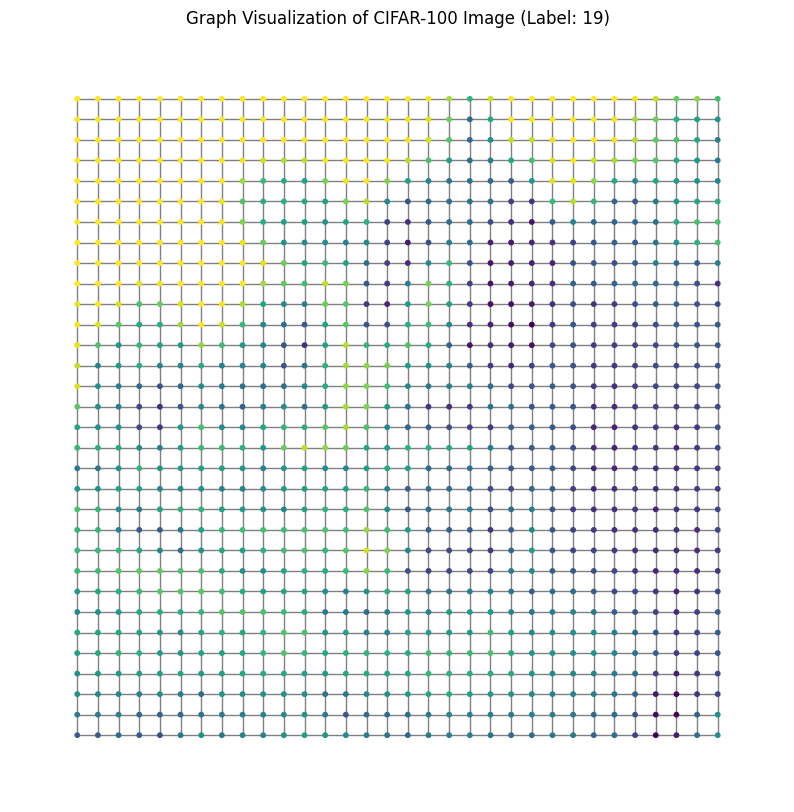

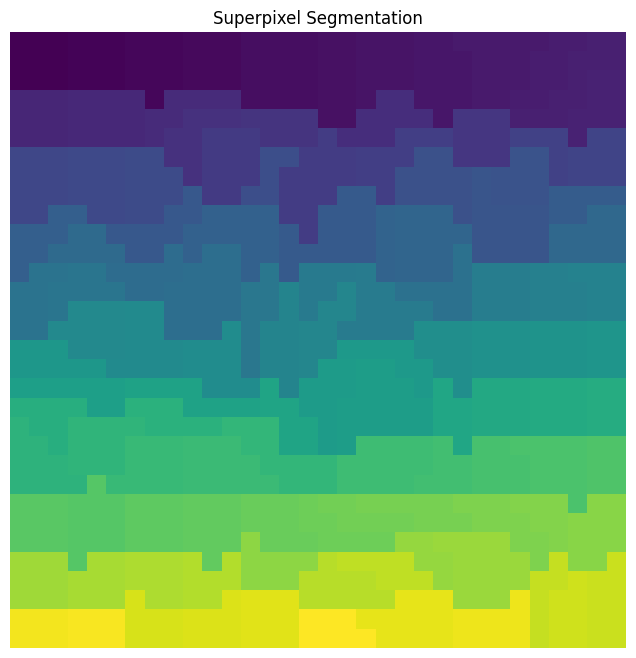

In [6]:
import torch
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from skimage.segmentation import slic
from skimage import color
from skimage.util import img_as_float

# Function to convert an image to graph
def image_to_graph(image):
    c, h, w = image.shape
    num_nodes = h * w
    node_features = image.view(c, -1).T  # shape: (h * w, c)
    
    edges = []
    for row in range(h):
        for col in range(w):
            idx = row * w + col
            # Right neighbor
            if col < w - 1:
                edges.append((idx, idx + 1))
            # Bottom neighbor
            if row < h - 1:
                edges.append((idx, idx + w))
    
    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))
    G.add_edges_from(edges)
    
    # Set node colors based on pixel intensity (grayscale average)
    node_colors = node_features.mean(dim=1).cpu().numpy()
    return G, node_colors

# Function to visualize the graph
def visualize_graph(image, label):
    c, h, w = image.shape
    num_nodes = h * w
    node_features = image.view(c, -1).T  # shape: (h * w, c)

    # Create graph
    edges = []
    for row in range(h):
        for col in range(w):
            idx = row * w + col
            # Right neighbor
            if col < w - 1:
                edges.append((idx, idx + 1))
            # Bottom neighbor
            if row < h - 1:
                edges.append((idx, idx + w))
    
    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))
    G.add_edges_from(edges)
    
    # Set node colors based on pixel intensity (grayscale average)
    node_colors = node_features.mean(dim=1).cpu().numpy()

    # Create a figure and axis explicitly
    plt.figure(figsize=(10, 10))
    ax = plt.gca()  # Get current axis

    # Position the nodes in a 32x32 grid
    pos = {i: (i % 32, 32 - (i // 32)) for i in range(32 * 32)}
    
    # Draw the graph
    nx.draw(G, pos, node_size=10, node_color=node_colors, cmap='viridis', edge_color='gray', with_labels=False, ax=ax)
    
    # Title and show the plot
    plt.title(f'Graph Visualization of CIFAR-100 Image (Label: {label})')
    plt.show()

# Superpixel generation using SLIC
def superpixel_segmentation(image):
    # Convert to floating point and normalize the image
    image = img_as_float(image)
    
    # Apply SLIC superpixel segmentation
    segments = slic(image, n_segments=100, compactness=10, sigma=1, start_label=1)
    
    return segments

# Plot the superpixels
def plot_superpixels(image, segments):
    plt.figure(figsize=(8, 8))
    plt.imshow(segments)
    plt.title("Superpixel Segmentation")
    plt.axis('off')
    plt.show()

# Load CIFAR-100 dataset
transform = transforms.Compose([
    transforms.ToTensor()
])
cifar100_train = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Visualize the first image from CIFAR-100 dataset as a graph and superpixels
image, label = cifar100_train[0]
image_np = image.permute(1, 2, 0).numpy()  # Convert image to numpy for superpixel processing

# Visualize graph
visualize_graph(image, label)

# Generate superpixels
segments = superpixel_segmentation(image_np)

# Plot superpixels
plot_superpixels(image_np, segments)


Files already downloaded and verified
Files already downloaded and verified
Epoch [1], Loss: 3.3452, Accuracy: 0.2024
Validation Loss: 2.8514, Validation Accuracy: 0.2869
Epoch [2], Loss: 2.5314, Accuracy: 0.3585
Validation Loss: 2.5830, Validation Accuracy: 0.3471
Epoch [3], Loss: 2.1476, Accuracy: 0.4376
Validation Loss: 2.4439, Validation Accuracy: 0.3851
Epoch [4], Loss: 1.8679, Accuracy: 0.4999
Validation Loss: 2.3758, Validation Accuracy: 0.4089
Epoch [5], Loss: 1.6202, Accuracy: 0.5583
Validation Loss: 2.4170, Validation Accuracy: 0.4100
Epoch [6], Loss: 1.3984, Accuracy: 0.6088
Validation Loss: 2.5285, Validation Accuracy: 0.4072
Epoch [7], Loss: 1.1860, Accuracy: 0.6618
Validation Loss: 2.6632, Validation Accuracy: 0.4011
Epoch [8], Loss: 0.9953, Accuracy: 0.7087
Validation Loss: 2.9356, Validation Accuracy: 0.4010
Epoch [9], Loss: 0.8302, Accuracy: 0.7536
Validation Loss: 3.1509, Validation Accuracy: 0.3891
Epoch [10], Loss: 0.6705, Accuracy: 0.7958
Validation Loss: 3.5149, V

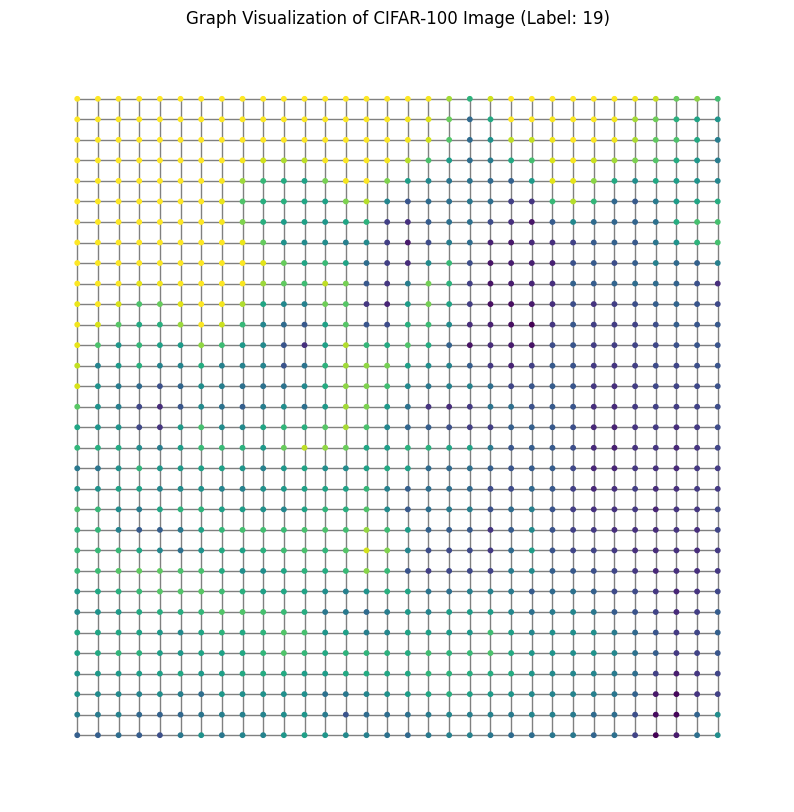

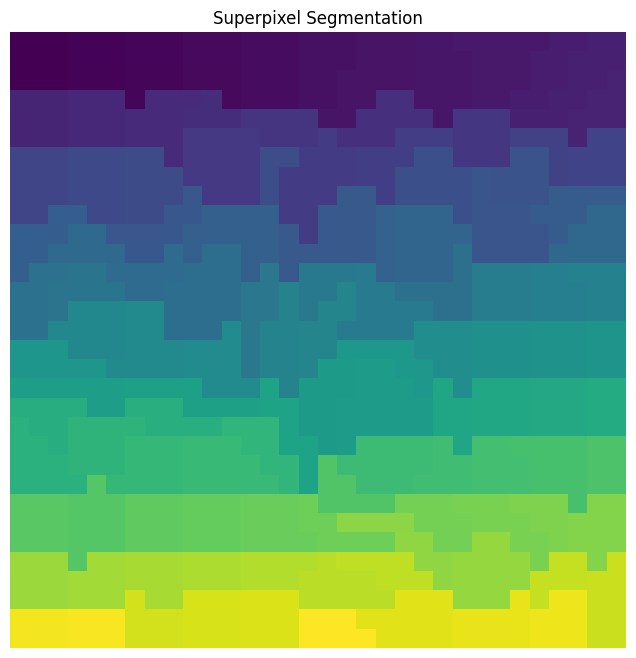

Training and Evaluation completed.


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision
import torchvision.transforms as transforms
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from skimage.segmentation import slic
from skimage import color
from skimage.util import img_as_float
from torchvision import datasets, models

# 1. **Model Architecture** (CNN)
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128*8*8, 256)
        self.fc2 = nn.Linear(256, 100)  # 100 classes for CIFAR-100
        
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2, 2)
        x = x.view(-1, 128*8*8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 2. **Transform and Dataset Loading**
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load CIFAR-100 dataset
train_dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

train_loader = data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# 3. **Graph Visualization Function**
def image_to_graph(image):
    c, h, w = image.shape
    num_nodes = h * w
    node_features = image.view(c, -1).T  # shape: (h * w, c)
    
    edges = []
    for row in range(h):
        for col in range(w):
            idx = row * w + col
            # Right neighbor
            if col < w - 1:
                edges.append((idx, idx + 1))
            # Bottom neighbor
            if row < h - 1:
                edges.append((idx, idx + w))
    
    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))
    G.add_edges_from(edges)
    
    # Set node colors based on pixel intensity (grayscale average)
    node_colors = node_features.mean(dim=1).cpu().numpy()
    return G, node_colors

def visualize_graph(image, label):
    c, h, w = image.shape
    num_nodes = h * w
    node_features = image.view(c, -1).T  # shape: (h * w, c)

    # Create graph
    edges = []
    for row in range(h):
        for col in range(w):
            idx = row * w + col
            # Right neighbor
            if col < w - 1:
                edges.append((idx, idx + 1))
            # Bottom neighbor
            if row < h - 1:
                edges.append((idx, idx + w))
    
    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))
    G.add_edges_from(edges)
    
    # Set node colors based on pixel intensity (grayscale average)
    node_colors = node_features.mean(dim=1).cpu().numpy()

    # Create a figure and axis explicitly
    plt.figure(figsize=(10, 10))
    ax = plt.gca()  # Get current axis

    # Position the nodes in a 32x32 grid
    pos = {i: (i % 32, 32 - (i // 32)) for i in range(32 * 32)}
    
    # Draw the graph
    nx.draw(G, pos, node_size=10, node_color=node_colors, cmap='viridis', edge_color='gray', with_labels=False, ax=ax)
    
    # Title and show the plot
    plt.title(f'Graph Visualization of CIFAR-100 Image (Label: {label})')
    plt.show()

# 4. **Superpixel Generation Function**
def superpixel_segmentation(image):
    # Convert to floating point and normalize the image
    image = img_as_float(image)
    
    # Apply SLIC superpixel segmentation
    segments = slic(image, n_segments=100, compactness=10, sigma=1, start_label=1)
    
    return segments

# Plot the superpixels
def plot_superpixels(image, segments):
    plt.figure(figsize=(8, 8))
    plt.imshow(segments)
    plt.title("Superpixel Segmentation")
    plt.axis('off')
    plt.show()

# 5. **Train and Evaluate the Model**
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model, loss function, and optimizer
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to train the model
def train(model, train_loader, criterion, optimizer, epoch):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct / total
    print(f"Epoch [{epoch+1}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")
    
    return epoch_loss, epoch_acc

# Function to evaluate the model
def evaluate(model, test_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_loss = running_loss / len(test_loader)
    val_acc = correct / total
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")
    
    return val_loss, val_acc

# Training loop
epochs = 10
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, criterion, optimizer, epoch)
    val_loss, val_acc = evaluate(model, test_loader, criterion)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

# 6. **Visualize Graph for the First Image**
image, label = train_dataset[0]
visualize_graph(image, label)

# Superpixel Visualization
image_np = image.permute(1, 2, 0).numpy()  # Convert to numpy for superpixel processing
segments = superpixel_segmentation(image_np)
plot_superpixels(image_np, segments)

# Print final results
print("Training and Evaluation completed.")


Files already downloaded and verified
Files already downloaded and verified
Superpixel labels (Numerical Pixel Values):
[[  1   1   1 ...  10  11  11]
 [  1   1   1 ...  11  11  11]
 [  1   1   1 ...  11  12  12]
 ...
 [ 98  98  98 ... 106 105 105]
 [112 112 112 ... 106 105 105]
 [112 112 112 ... 106 105 105]]


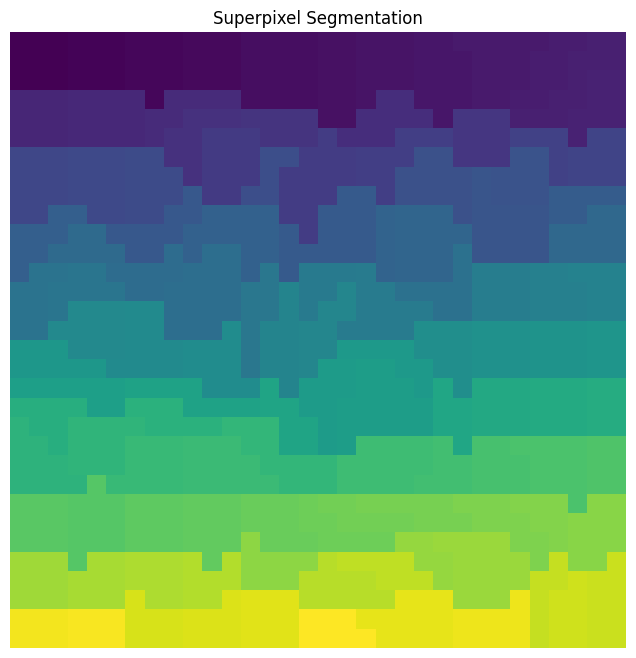

In [8]:
import torch
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage.util import img_as_float
from torchvision import datasets, transforms

# Load CIFAR-100 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Function to generate superpixels using SLIC algorithm
def superpixel_segmentation(image):
    image = img_as_float(image)  # Convert to floating point and normalize
    segments = slic(image, n_segments=100, compactness=10, sigma=1, start_label=1)
    return segments

# Function to print superpixel labels as numerical values
def print_superpixel_labels(image):
    image_np = image.permute(1, 2, 0).numpy()  # Convert image to numpy for superpixel processing
    segments = superpixel_segmentation(image_np)  # Perform SLIC segmentation
    
    # Print the superpixel labels for each pixel in the image
    print("Superpixel labels (Numerical Pixel Values):")
    print(segments)  # This will show the label assigned to each pixel
    
    return segments

# Visualize superpixel segmentation labels
def plot_superpixels(image, segments):
    plt.figure(figsize=(8, 8))
    plt.imshow(segments)
    plt.title("Superpixel Segmentation")
    plt.axis('off')
    plt.show()

# Load the first image from the CIFAR-100 training set
image, label = train_dataset[0]

# Print superpixel labels (numerical pixel values)
segments = print_superpixel_labels(image)

# Visualize the superpixels
plot_superpixels(image.permute(1, 2, 0).numpy(), segments)  # Convert to numpy for visualization


Files already downloaded and verified
Files already downloaded and verified
Epoch [1], Loss: 3.4052, Accuracy: 0.1940
Validation Loss: 2.8927, Validation Accuracy: 0.2905
Epoch [2], Loss: 2.5976, Accuracy: 0.3419
Validation Loss: 2.5999, Validation Accuracy: 0.3530
Epoch [3], Loss: 2.2265, Accuracy: 0.4192
Validation Loss: 2.4381, Validation Accuracy: 0.3865
Epoch [4], Loss: 1.9700, Accuracy: 0.4773
Validation Loss: 2.3561, Validation Accuracy: 0.4097
Epoch [5], Loss: 1.7444, Accuracy: 0.5274
Validation Loss: 2.3730, Validation Accuracy: 0.4068
Epoch [6], Loss: 1.5413, Accuracy: 0.5774
Validation Loss: 2.4763, Validation Accuracy: 0.4024
Epoch [7], Loss: 1.3446, Accuracy: 0.6227
Validation Loss: 2.6292, Validation Accuracy: 0.4015
Epoch [8], Loss: 1.1615, Accuracy: 0.6658
Validation Loss: 2.8314, Validation Accuracy: 0.3862
Epoch [9], Loss: 0.9947, Accuracy: 0.7115
Validation Loss: 3.0927, Validation Accuracy: 0.3781
Epoch [10], Loss: 0.8417, Accuracy: 0.7510
Validation Loss: 3.3136, V

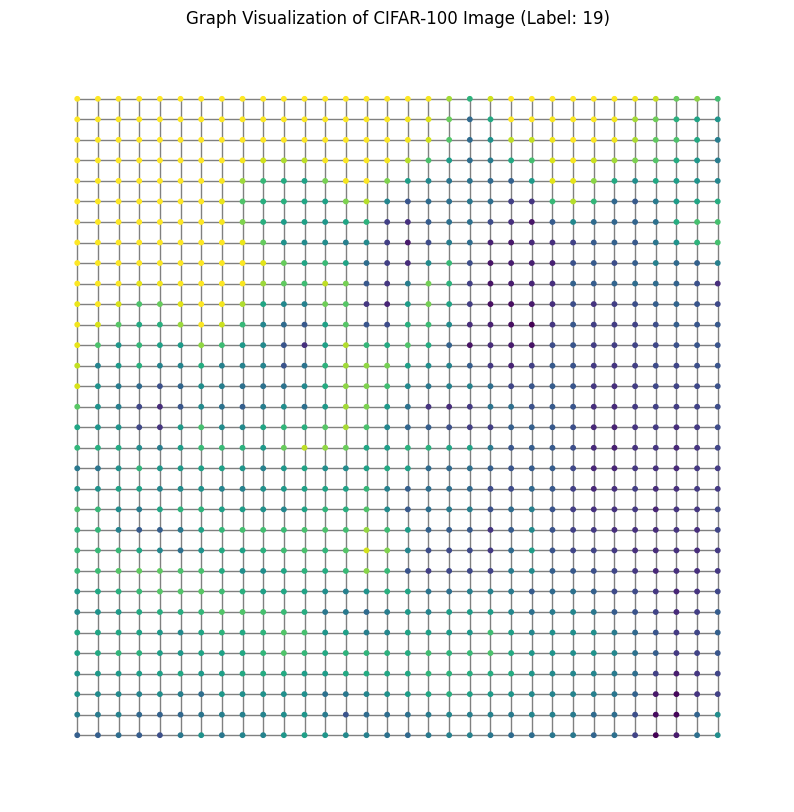

Superpixel labels (Numerical Pixel Values):
[[  1   1   1 ...  10  11  11]
 [  1   1   1 ...  11  11  11]
 [  1   1   1 ...  11  11  12]
 ...
 [ 98  98  98 ... 112 106 106]
 [113 113 113 ... 112 106 106]
 [113 113 113 ... 112 106 106]]


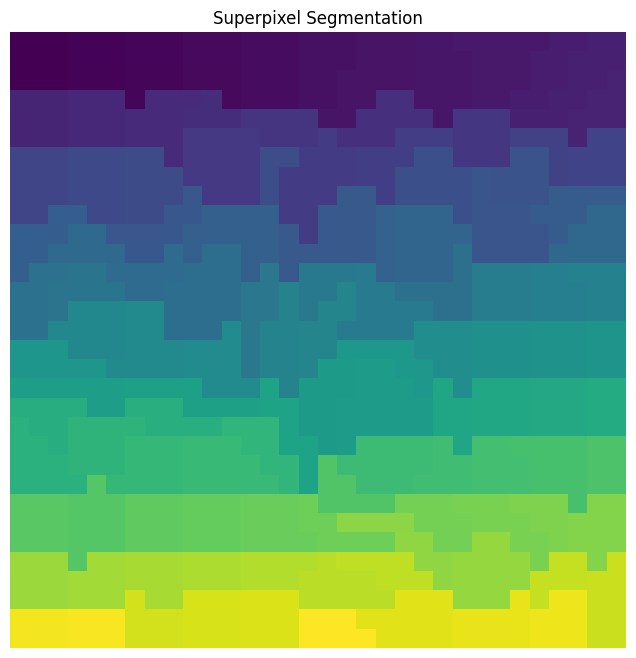

Training and Evaluation completed.


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision
import torchvision.transforms as transforms
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from skimage.segmentation import slic
from skimage import color
from skimage.util import img_as_float
from torchvision import datasets, models

# 1. **Model Architecture** (CNN)
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128*8*8, 256)
        self.fc2 = nn.Linear(256, 100)  # 100 classes for CIFAR-100
        
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2, 2)
        x = x.view(-1, 128*8*8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 2. **Transform and Dataset Loading**
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load CIFAR-100 dataset
train_dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

train_loader = data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# 3. **Graph Visualization Function**
def image_to_graph(image):
    c, h, w = image.shape
    num_nodes = h * w
    node_features = image.view(c, -1).T  # shape: (h * w, c)
    
    edges = []
    for row in range(h):
        for col in range(w):
            idx = row * w + col
            # Right neighbor
            if col < w - 1:
                edges.append((idx, idx + 1))
            # Bottom neighbor
            if row < h - 1:
                edges.append((idx, idx + w))
    
    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))
    G.add_edges_from(edges)
    
    # Set node colors based on pixel intensity (grayscale average)
    node_colors = node_features.mean(dim=1).cpu().numpy()
    return G, node_colors

def visualize_graph(image, label):
    c, h, w = image.shape
    num_nodes = h * w
    node_features = image.view(c, -1).T  # shape: (h * w, c)

    # Create graph
    edges = []
    for row in range(h):
        for col in range(w):
            idx = row * w + col
            # Right neighbor
            if col < w - 1:
                edges.append((idx, idx + 1))
            # Bottom neighbor
            if row < h - 1:
                edges.append((idx, idx + w))
    
    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))
    G.add_edges_from(edges)
    
    # Set node colors based on pixel intensity (grayscale average)
    node_colors = node_features.mean(dim=1).cpu().numpy()

    # Create a figure and axis explicitly
    plt.figure(figsize=(10, 10))
    ax = plt.gca()  # Get current axis

    # Position the nodes in a 32x32 grid
    pos = {i: (i % 32, 32 - (i // 32)) for i in range(32 * 32)}
    
    # Draw the graph
    nx.draw(G, pos, node_size=10, node_color=node_colors, cmap='viridis', edge_color='gray', with_labels=False, ax=ax)
    
    # Title and show the plot
    plt.title(f'Graph Visualization of CIFAR-100 Image (Label: {label})')
    plt.show()

# 4. **Superpixel Generation Function**
def superpixel_segmentation(image):
    # Convert to floating point and normalize the image
    image = img_as_float(image)
    
    # Apply SLIC superpixel segmentation
    segments = slic(image, n_segments=100, compactness=10, sigma=1, start_label=1)
    
    return segments

# Function to print superpixel labels as numerical values
def print_superpixel_labels(image):
    image_np = image.permute(1, 2, 0).numpy()  # Convert image to numpy for superpixel processing
    segments = superpixel_segmentation(image_np)  # Perform SLIC segmentation
    
    # Print the superpixel labels for each pixel in the image
    print("Superpixel labels (Numerical Pixel Values):")
    print(segments)  # This will show the label assigned to each pixel
    
    return segments

# Visualize superpixel segmentation labels
def plot_superpixels(image, segments):
    plt.figure(figsize=(8, 8))
    plt.imshow(segments)
    plt.title("Superpixel Segmentation")
    plt.axis('off')
    plt.show()

# 5. **Train and Evaluate the Model**
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model, loss function, and optimizer
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to train the model
def train(model, train_loader, criterion, optimizer, epoch):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct / total
    print(f"Epoch [{epoch+1}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")
    
    return epoch_loss, epoch_acc

# Function to evaluate the model
def evaluate(model, test_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_loss = running_loss / len(test_loader)
    val_acc = correct / total
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")
    
    return val_loss, val_acc

# Training loop
epochs = 10
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, criterion, optimizer, epoch)
    val_loss, val_acc = evaluate(model, test_loader, criterion)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

# 6. **Visualize Graph for the First Image**
image, label = train_dataset[0]
visualize_graph(image, label)

# Superpixel Visualization
segments = print_superpixel_labels(image)

# Visualize the superpixels
plot_superpixels(image.permute(1, 2, 0).numpy(), segments)

# Print final results
print("Training and Evaluation completed.")


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision
import torchvision.transforms as transforms
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool
from torchvision import datasets

# 1. **Model Architecture** (Graph Neural Network with Global Pooling)
class GCN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        # Apply GCN layers
        x = torch.relu(self.conv1(x, edge_index))
        x = torch.relu(self.conv2(x, edge_index))
        
        # Apply global mean pooling to aggregate node features
        x = global_mean_pool(x, batch)  # Pooling over the nodes to get a single graph representation
        
        # Apply the final fully connected layer
        x = self.fc(x)
        return x

# 2. **Graph Conversion Function** (Image to Graph)
def image_to_graph(image, label, width=32, height=32):
    c, h, w = image.shape
    num_nodes = h * w
    
    # Create node features by reshaping the image into a 1D tensor
    node_features = image.view(c, -1).T  # shape: (h * w, c)
    
    # Create edges between adjacent pixels
    edges = []
    for row in range(h):
        for col in range(w):
            idx = row * w + col
            # Right neighbor
            if col < w - 1:
                edges.append((idx, idx + 1))
            # Bottom neighbor
            if row < h - 1:
                edges.append((idx, idx + w))
    
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    
    # Add a batch index to the data (batch_size=1 in this case)
    batch = torch.zeros(num_nodes, dtype=torch.long)  # all nodes belong to the same image
    
    data = Data(x=node_features, edge_index=edge_index, batch=batch)
    return data

# 3. **Load CIFAR-100 Dataset**
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

train_loader = data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# 4. **Training and Evaluation Functions**
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the GCN model
input_dim = 3  # RGB channels
hidden_dim = 64
output_dim = 100  # CIFAR-100 has 100 classes
model = GCN(input_dim, hidden_dim, output_dim).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to train the model
def train(model, train_loader, criterion, optimizer, epoch):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        # Convert images to graphs (batch of graphs)
        batch_data = []
        for i in range(inputs.size(0)):
            image = inputs[i]  # single image from the batch
            label = labels[i]  # corresponding label
            data = image_to_graph(image, label)
            batch_data.append(data)
        
        # Pass the batch of graphs to the model
        data_list = batch_data
        data_batch = DataLoader(data_list, batch_size=len(data_list))
        
        for batch_data in data_batch:
            batch_data = batch_data.to(device)
            outputs = model(batch_data)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        
        running_loss += loss.item()
        
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct / total
    print(f"Epoch [{epoch+1}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")
    
    return epoch_loss, epoch_acc

# Function to evaluate the model
def evaluate(model, test_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Convert images to graphs (batch of graphs)
            batch_data = []
            for i in range(inputs.size(0)):
                image = inputs[i]  # single image from the batch
                label = labels[i]  # corresponding label
                data = image_to_graph(image, label)
                batch_data.append(data)
            
            # Create a batch of graphs
            batch_data = DataLoader(batch_data, batch_size=len(batch_data))
            
            # Pass the batch of graphs to the model
            for batch_data in batch_data:
                batch_data = batch_data.to(device)
                outputs = model(batch_data)
                loss = criterion(outputs, labels)
                running_loss += loss.item()
                
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
    
    val_loss = running_loss / len(test_loader)
    val_acc = correct / total
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")
    
    return val_loss, val_acc

# Training loop
epochs = 10
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, criterion, optimizer, epoch)
    val_loss, val_acc = evaluate(model, test_loader, criterion)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

# 5. **Graph Visualization for the First Image**
image, label = train_dataset[0]
data = image_to_graph(image, label)

# Visualize the graph
def visualize_graph(data):
    G = nx.Graph()
    num_nodes = data.x.shape[0]
    
    # Add nodes and edges to the graph
    G.add_nodes_from(range(num_nodes))
    edges = data.edge_index.t().tolist()
    G.add_edges_from(edges)
    
    # Visualize the graph
    plt.figure(figsize=(10, 10))
    nx.draw(G, node_size=10, edge_color='gray', with_labels=False, node_color=data.x.mean(dim=1).cpu().numpy(), cmap='viridis')
    plt.title("Graph Visualization of CIFAR-100 Image")
    plt.show()

# Visualize the graph
visualize_graph(data)

# 6. **Print Final Results**
print("Training and Evaluation completed.")




Files already downloaded and verified
Files already downloaded and verified
Epoch [1], Loss: 4.3008, Accuracy: 0.0466
Validation Loss: 4.1628, Validation Accuracy: 0.0696
Epoch [2], Loss: 4.1070, Accuracy: 0.0762
Validation Loss: 4.0634, Validation Accuracy: 0.0906
Epoch [3], Loss: 4.0267, Accuracy: 0.0901
Validation Loss: 3.9997, Validation Accuracy: 0.0925
Epoch [4], Loss: 3.9759, Accuracy: 0.0962
Validation Loss: 3.9721, Validation Accuracy: 0.0941
Epoch [5], Loss: 3.9482, Accuracy: 0.1026
Validation Loss: 3.9422, Validation Accuracy: 0.1012
Epoch [6], Loss: 3.9258, Accuracy: 0.1049
Validation Loss: 3.9254, Validation Accuracy: 0.1044
Epoch [7], Loss: 3.9107, Accuracy: 0.1059
Validation Loss: 3.9118, Validation Accuracy: 0.1051
Epoch [8], Loss: 3.8976, Accuracy: 0.1099
Validation Loss: 3.9056, Validation Accuracy: 0.1097
Epoch [9], Loss: 3.8859, Accuracy: 0.1114
Validation Loss: 3.8930, Validation Accuracy: 0.1140
Epoch [10], Loss: 3.8764, Accuracy: 0.1110
Validation Loss: 3.8841, V

TypeError: '_AxesStack' object is not callable

<Figure size 1000x1000 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt  # Reload to reset plt



In [2]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.data import Data, DataLoader
from torchvision import datasets, transforms
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Load CIFAR-100 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

cifar100_train = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
cifar100_test = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Convert an image to a graph
def image_to_graph(image, label):
    image = image.squeeze().permute(1, 2, 0)  # Convert CxHxW to HxWxC
    h, w, c = image.shape

    # Nodes are each pixel, with 3 features for RGB
    x = image.reshape(h * w, c)
    
    # Create edges for 4-connected pixels (top, bottom, left, right)
    edges = []
    for i in range(h):
        for j in range(w):
            index = i * w + j
            if i < h - 1:  # Down
                edges.append((index, index + w))
            if j < w - 1:  # Right
                edges.append((index, index + 1))
    
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    x = x.view(-1, 3)

    return Data(x=x, edge_index=edge_index, y=torch.tensor([label], dtype=torch.long))

# Create graph datasets
train_graphs = [image_to_graph(data[0], data[1]) for data in cifar100_train]
test_graphs = [image_to_graph(data[0], data[1]) for data in cifar100_test]

train_loader = DataLoader(train_graphs, batch_size=64, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=64)

# Define a GNN model
class GCN(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, 64)
        self.conv2 = GCNConv(64, 128)
        self.conv3 = GCNConv(128, 64)
        self.fc = torch.nn.Linear(64, num_classes)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = F.relu(self.conv3(x, edge_index))
        x = global_mean_pool(x, batch)
        x = self.fc(x)
        return x

# Initialize model, loss function, and optimizer
num_features = 3  # RGB channels
num_classes = 100  # CIFAR-100 has 100 classes
model = GCN(num_features, num_classes)
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train(model, loader, criterion, optimizer):
    model.train()
    total_loss, correct = 0, 0
    for data in loader:
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
        pred = out.argmax(dim=1)
        correct += (pred == data.y).sum().item()
    return total_loss / len(loader.dataset), correct / len(loader.dataset)

# Evaluation function
def evaluate(model, loader, criterion):
    model.eval()
    total_loss, correct = 0, 0
    with torch.no_grad():
        for data in loader:
            out = model(data)
            loss = criterion(out, data.y)
            total_loss += loss.item() * data.num_graphs
            pred = out.argmax(dim=1)
            correct += (pred == data.y).sum().item()
    return total_loss / len(loader.dataset), correct / len(loader.dataset)

# Train and evaluate the model
epochs = 1
for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, criterion, optimizer)
    val_loss, val_acc = evaluate(model, test_loader, criterion)
    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

# Graph visualization function
def visualize_graph(data):
    G = nx.Graph()
    edges = data.edge_index.cpu().numpy().T  # Transpose for NetworkX format
    G.add_edges_from(edges)
    node_colors = data.x.mean(dim=1).cpu().numpy()
    pos = {i: (i % 32, 32 - (i // 32)) for i in range(data.num_nodes)}

    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, node_size=10, node_color=node_colors, cmap='viridis', edge_color='gray', with_labels=False)
    plt.title("Graph Visualization of CIFAR-100 Image")
    plt.colorbar(plt.cm.ScalarMappable(cmap="viridis"), label="Average Pixel Intensity")
    plt.show()

# Visualize the first sample graph
visualize_graph(train_graphs[0])


Files already downloaded and verified
Files already downloaded and verified


C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 1/1, Train Loss: 4.2828, Train Acc: 0.0475, Val Loss: 4.1351, Val Acc: 0.0717


TypeError: '_AxesStack' object is not callable

<Figure size 1000x1000 with 0 Axes>

In [20]:
%matplotlib inline


In [21]:
import matplotlib.pyplot as plt
plt.close('all')


In [23]:
!pip install --upgrade matplotlib


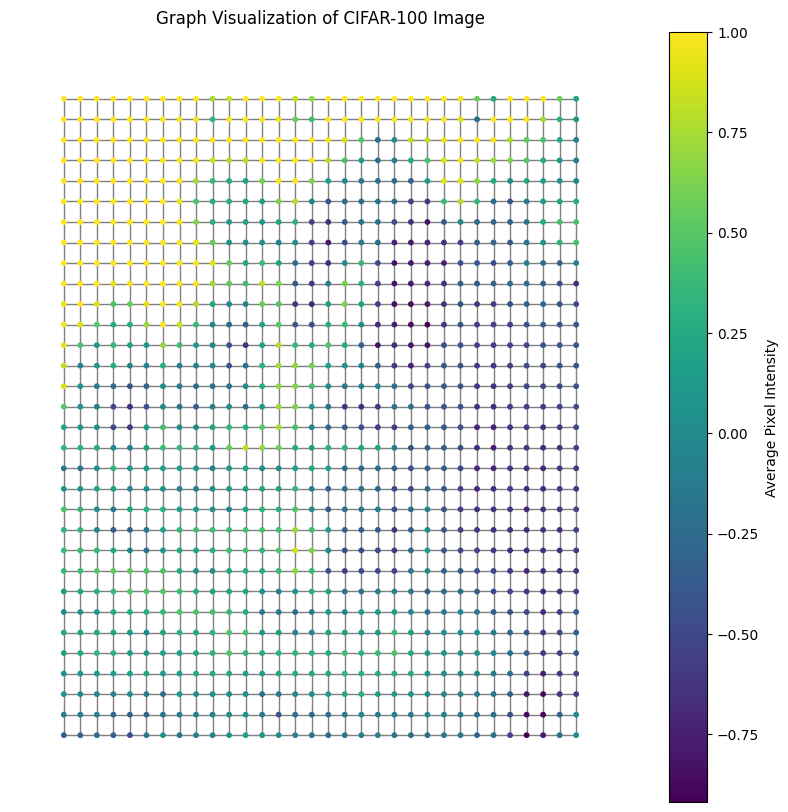

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

# Your graph data (assuming `data` is the sample graph object)
def visualize_graph(data):
    # Create graph G
    G = nx.Graph()
    G.add_edges_from(data.edge_index.t().cpu().numpy())

    # Define the positions of nodes
    pos = {i: (i % 32, 32 - (i // 32)) for i in range(data.num_nodes)}

    # Set up node colors based on some node attribute, here using `data.x.mean(dim=1)`
    node_colors = data.x.mean(dim=1).cpu().numpy()

    # Create a figure and axis explicitly
    fig, ax = plt.subplots(figsize=(10, 10))

    # Draw the graph with the provided axis
    nx.draw(
        G, pos, node_size=10, node_color=node_colors, cmap='viridis',
        edge_color='gray', with_labels=False, ax=ax
    )

    # Color bar configuration for the node color intensity
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=node_colors.min(), vmax=node_colors.max()))
    sm.set_array(node_colors)
    fig.colorbar(sm, ax=ax, label="Average Pixel Intensity")

    plt.title("Graph Visualization of CIFAR-100 Image")
    plt.show()

# Assuming train_graphs is a list of graph objects and train_graphs[0] is a valid graph
visualize_graph(train_graphs[0])


In [4]:
!pip install --upgrade matplotlib networkx


                                              0.0/1.7 MB ? eta -:--:--
     ----------                               0.5/1.7 MB 9.8 MB/s eta 0:00:01
     ---------------------                    0.9/1.7 MB 11.6 MB/s eta 0:00:01
     --------------------------               1.1/1.7 MB 10.4 MB/s eta 0:00:01
     --------------------------               1.1/1.7 MB 10.4 MB/s eta 0:00:01
     --------------------------               1.1/1.7 MB 10.4 MB/s eta 0:00:01
     --------------------------               1.1/1.7 MB 10.4 MB/s eta 0:00:01
     --------------------------               1.1/1.7 MB 10.4 MB/s eta 0:00:01
     --------------------------------         1.4/1.7 MB 3.7 MB/s eta 0:00:01
     ---------------------------------------- 1.7/1.7 MB 4.1 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.4
    Uninstalling networkx-2.8.4:
      Successfully uninstalled networkx-2.8.4


Files already downloaded and verified
Files already downloaded and verified


C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 1/150, Train Loss: 4.2682, Train Acc: 0.0505, Val Loss: 4.1265, Val Acc: 0.0701
Epoch 2/150, Train Loss: 4.0589, Train Acc: 0.0815, Val Loss: 4.0088, Val Acc: 0.0925
Epoch 3/150, Train Loss: 3.9743, Train Acc: 0.0958, Val Loss: 3.9603, Val Acc: 0.0941
Epoch 4/150, Train Loss: 3.9360, Train Acc: 0.1010, Val Loss: 3.9379, Val Acc: 0.1040
Epoch 5/150, Train Loss: 3.9102, Train Acc: 0.1047, Val Loss: 3.9157, Val Acc: 0.1045
Epoch 6/150, Train Loss: 3.8924, Train Acc: 0.1079, Val Loss: 3.9016, Val Acc: 0.1050
Epoch 7/150, Train Loss: 3.8789, Train Acc: 0.1092, Val Loss: 3.8914, Val Acc: 0.1097
Epoch 8/150, Train Loss: 3.8680, Train Acc: 0.1118, Val Loss: 3.8794, Val Acc: 0.1167
Epoch 9/150, Train Loss: 3.8563, Train Acc: 0.1143, Val Loss: 3.8755, Val Acc: 0.1156
Epoch 10/150, Train Loss: 3.8471, Train Acc: 0.1163, Val Loss: 3.8678, Val Acc: 0.1159
Epoch 11/150, Train Loss: 3.8398, Train Acc: 0.1189, Val Loss: 3.8561, Val Acc: 0.1201
Epoch 12/150, Train Loss: 3.8311, Train Acc: 0.1202,

Epoch 96/150, Train Loss: 3.5576, Train Acc: 0.1703, Val Loss: 3.6632, Val Acc: 0.1623
Epoch 97/150, Train Loss: 3.5546, Train Acc: 0.1700, Val Loss: 3.6650, Val Acc: 0.1588
Epoch 98/150, Train Loss: 3.5546, Train Acc: 0.1698, Val Loss: 3.6731, Val Acc: 0.1620
Epoch 99/150, Train Loss: 3.5517, Train Acc: 0.1686, Val Loss: 3.6684, Val Acc: 0.1597
Epoch 100/150, Train Loss: 3.5506, Train Acc: 0.1715, Val Loss: 3.6682, Val Acc: 0.1584
Epoch 101/150, Train Loss: 3.5484, Train Acc: 0.1702, Val Loss: 3.6699, Val Acc: 0.1592
Epoch 102/150, Train Loss: 3.5479, Train Acc: 0.1712, Val Loss: 3.6783, Val Acc: 0.1575
Epoch 103/150, Train Loss: 3.5473, Train Acc: 0.1711, Val Loss: 3.6702, Val Acc: 0.1608
Epoch 104/150, Train Loss: 3.5453, Train Acc: 0.1701, Val Loss: 3.6584, Val Acc: 0.1626
Epoch 105/150, Train Loss: 3.5438, Train Acc: 0.1703, Val Loss: 3.6559, Val Acc: 0.1625
Epoch 106/150, Train Loss: 3.5422, Train Acc: 0.1721, Val Loss: 3.6668, Val Acc: 0.1590
Epoch 107/150, Train Loss: 3.5416, T

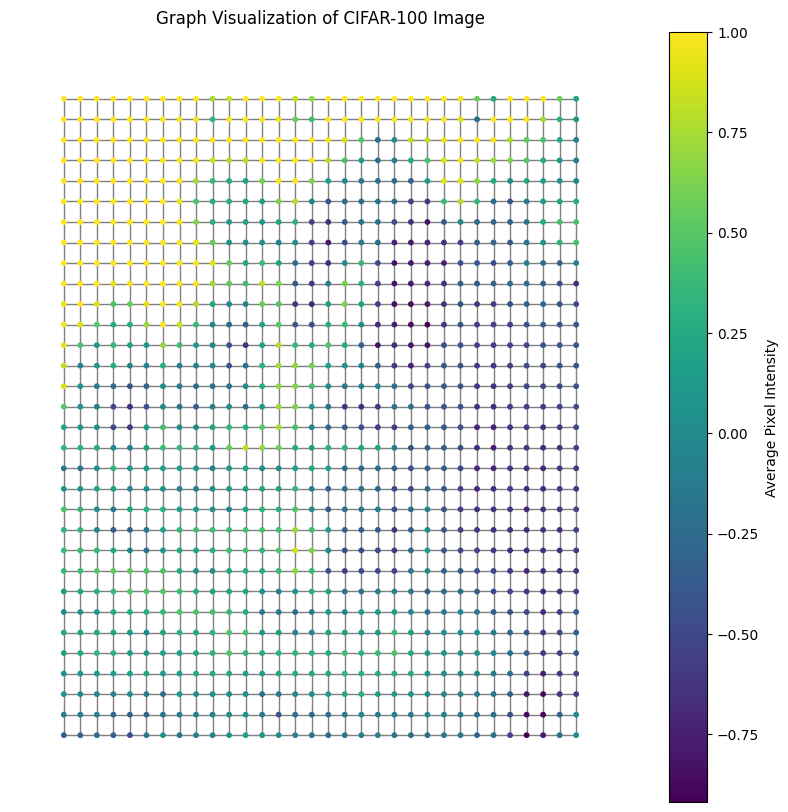

In [1]:
import torch 
import torch.nn.functional as F
import torch.optim as optim
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.data import Data, DataLoader
from torchvision import datasets, transforms
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Load CIFAR-100 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

cifar100_train = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
cifar100_test = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Convert an image to a graph
def image_to_graph(image, label):
    image = image.squeeze().permute(1, 2, 0)  # Convert CxHxW to HxWxC
    h, w, c = image.shape

    # Nodes are each pixel, with 3 features for RGB
    x = image.reshape(h * w, c)
    
    # Create edges for 4-connected pixels (top, bottom, left, right)
    edges = []
    for i in range(h):
        for j in range(w):
            index = i * w + j
            if i < h - 1:  # Down
                edges.append((index, index + w))
            if j < w - 1:  # Right
                edges.append((index, index + 1))
    
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    x = x.view(-1, 3)

    return Data(x=x, edge_index=edge_index, y=torch.tensor([label], dtype=torch.long))

# Create graph datasets
train_graphs = [image_to_graph(data[0], data[1]) for data in cifar100_train]
test_graphs = [image_to_graph(data[0], data[1]) for data in cifar100_test]

train_loader = DataLoader(train_graphs, batch_size=64, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=64)

# Define a GNN model
class GCN(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, 64)
        self.conv2 = GCNConv(64, 128)
        self.conv3 = GCNConv(128, 64)
        self.fc = torch.nn.Linear(64, num_classes)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = F.relu(self.conv3(x, edge_index))
        x = global_mean_pool(x, batch)
        x = self.fc(x)
        return x

# Initialize model, loss function, and optimizer
num_features = 3  # RGB channels
num_classes = 100  # CIFAR-100 has 100 classes
model = GCN(num_features, num_classes)
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train(model, loader, criterion, optimizer):
    model.train()
    total_loss, correct = 0, 0
    for data in loader:
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
        pred = out.argmax(dim=1)
        correct += (pred == data.y).sum().item()
    return total_loss / len(loader.dataset), correct / len(loader.dataset)

# Evaluation function
def evaluate(model, loader, criterion):
    model.eval()
    total_loss, correct = 0, 0
    with torch.no_grad():
        for data in loader:
            out = model(data)
            loss = criterion(out, data.y)
            total_loss += loss.item() * data.num_graphs
            pred = out.argmax(dim=1)
            correct += (pred == data.y).sum().item()
    return total_loss / len(loader.dataset), correct / len(loader.dataset)

# Train and evaluate the model
epochs = 150
for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, criterion, optimizer)
    val_loss, val_acc = evaluate(model, test_loader, criterion)
    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

# Graph visualization function
def visualize_graph(data):
    G = nx.Graph()
    edges = data.edge_index.cpu().numpy().T  # Transpose for NetworkX format
    G.add_edges_from(edges)
    
    # Node colors based on average pixel intensity
    node_colors = data.x.mean(dim=1).cpu().numpy()
    
    # Define the layout of nodes (simple grid for CIFAR-100 images)
    pos = {i: (i % 32, 32 - (i // 32)) for i in range(data.num_nodes)}

    # Create a figure and axes explicitly
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot the graph
    nx.draw(G, pos, node_size=10, node_color=node_colors, cmap='viridis', edge_color='gray', with_labels=False, ax=ax)
    
    # Add a color bar to indicate the pixel intensity
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=node_colors.min(), vmax=node_colors.max()))
    sm.set_array([])  # Empty array as we already provided the normalization and color map
    plt.colorbar(sm, ax=ax, label="Average Pixel Intensity")
    
    plt.title("Graph Visualization of CIFAR-100 Image")
    plt.show()

# Visualize the first sample graph from the training dataset
visualize_graph(train_graphs[0])


